In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_1D_wave(A, f, phase, wave_type='sine', time_duration=1, sampling_rate=1000):
  t = np.linspace(0, time_duration, time_duration * sampling_rate)
  if wave_type == 'sine':
    wave = A * np.sin(2 * np.pi * f * t + phase)
  elif wave_type == 'cosine':
    wave = A * np.cos(2 * np.pi * f * t + phase)

  plt.figure()
  plt.plot(t, wave)
  plt.title(f"{wave_type.capitalize()} Wave: A={A}, f={f}, phase={phase}")
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.grid()
  plt.show()

def plot_2D_wave(A, fx, fy, wave_type='sine', size=(100, 100)):
  x = np.linspace(0, 1, size[0])
  y = np.linspace(0, 1, size[1])
  X, Y = np.meshgrid(x, y)

  if wave_type == 'sine':
    Z = A * np.sin(2 * np.pi * fx * X + 2 * np.pi * fy * Y)
  elif wave_type == 'cosine':
    Z = A * np.cos(2 * np.pi * fx * X + 2 * np.pi * fy * Y)
    
  plt.figure()
  plt.imshow(Z, cmap='gray', extent=[0, 1, 0, 1], origin='lower')
  plt.title(f"{wave_type.capitalize()} Wave: A={A}, fx={fx}, fy={fy}")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.colorbar()
  plt.show()

def plot_combined_2D_wave(A, B, fx, fy, size=(100, 100)):
  x = np.linspace(0, 1, size[0])
  y = np.linspace(0, 1, size[1])
  X, Y = np.meshgrid(x, y)

  Z = A * np.sin(2 * np.pi * fx * X) + B * np.sin(2 * np.pi * fy * Y)

  plt.figure()
  plt.imshow(Z, cmap='gray', extent=[0, 1, 0, 1], origin='lower')
  plt.title(f"Combined Wave: A={A}, B={B}, fx={fx}, fy={fy}")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.colorbar()
  plt.show()

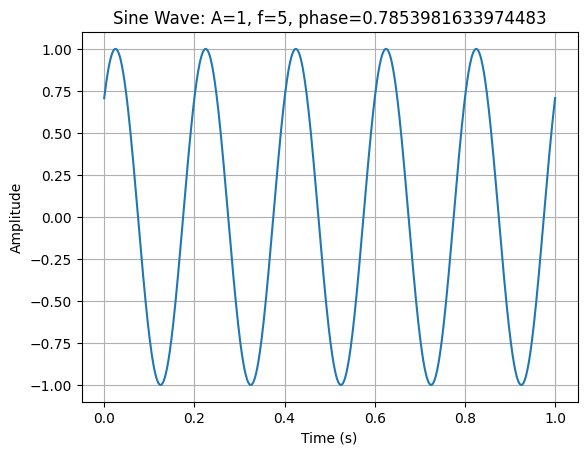

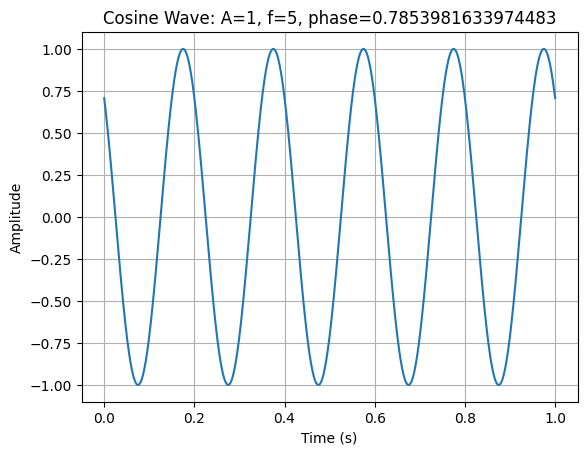

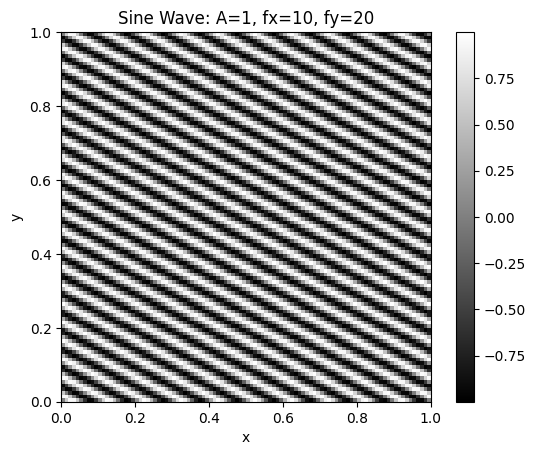

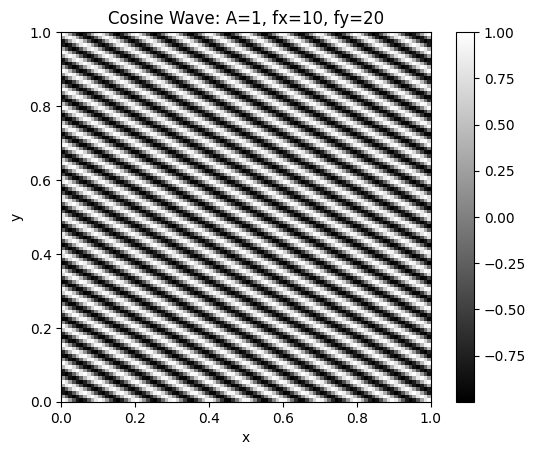

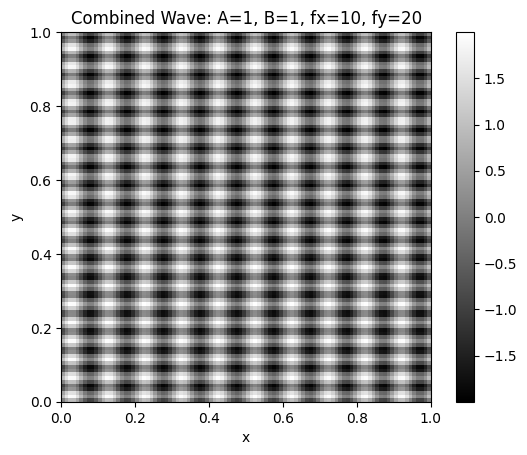

In [3]:
A = 1
f = 5
phase = np.pi / 4
time_duration = 1
sampling_rate = 1000

plot_1D_wave(A, f, phase, wave_type='sine', time_duration=time_duration, sampling_rate=sampling_rate)
plot_1D_wave(A, f, phase, wave_type='cosine', time_duration=time_duration, sampling_rate=sampling_rate)

A = 1
fx = 10
fy = 20
size = (100, 100)

plot_2D_wave(A, fx, fy, wave_type='sine', size=size)
plot_2D_wave(A, fx, fy, wave_type='cosine', size=size)

B = 1
plot_combined_2D_wave(A, B, fx, fy, size=size)

In [7]:
def square_wave_approximation(x, order):
  result = 0
  for n in range(order):
    k = 2 * n + 1
    result += (1 / k) * np.sin(2 * np.pi * k * x)
  return result

def plot_square_wave_approximations(orders, num_points=1000):
  x = np.linspace(0, 1, num_points)

  fig, axes = plt.subplots(len(orders), 1, figsize=(10, 5 * len(orders)), sharex=True, sharey=True)
  
  for ax, order in zip(axes, orders):
    y = square_wave_approximation(x, order)
    ax.plot(x, y)
    ax.set_title(f"Square Wave Approximation (Order: {order})")
    ax.grid()
  
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.tight_layout()
  plt.show()

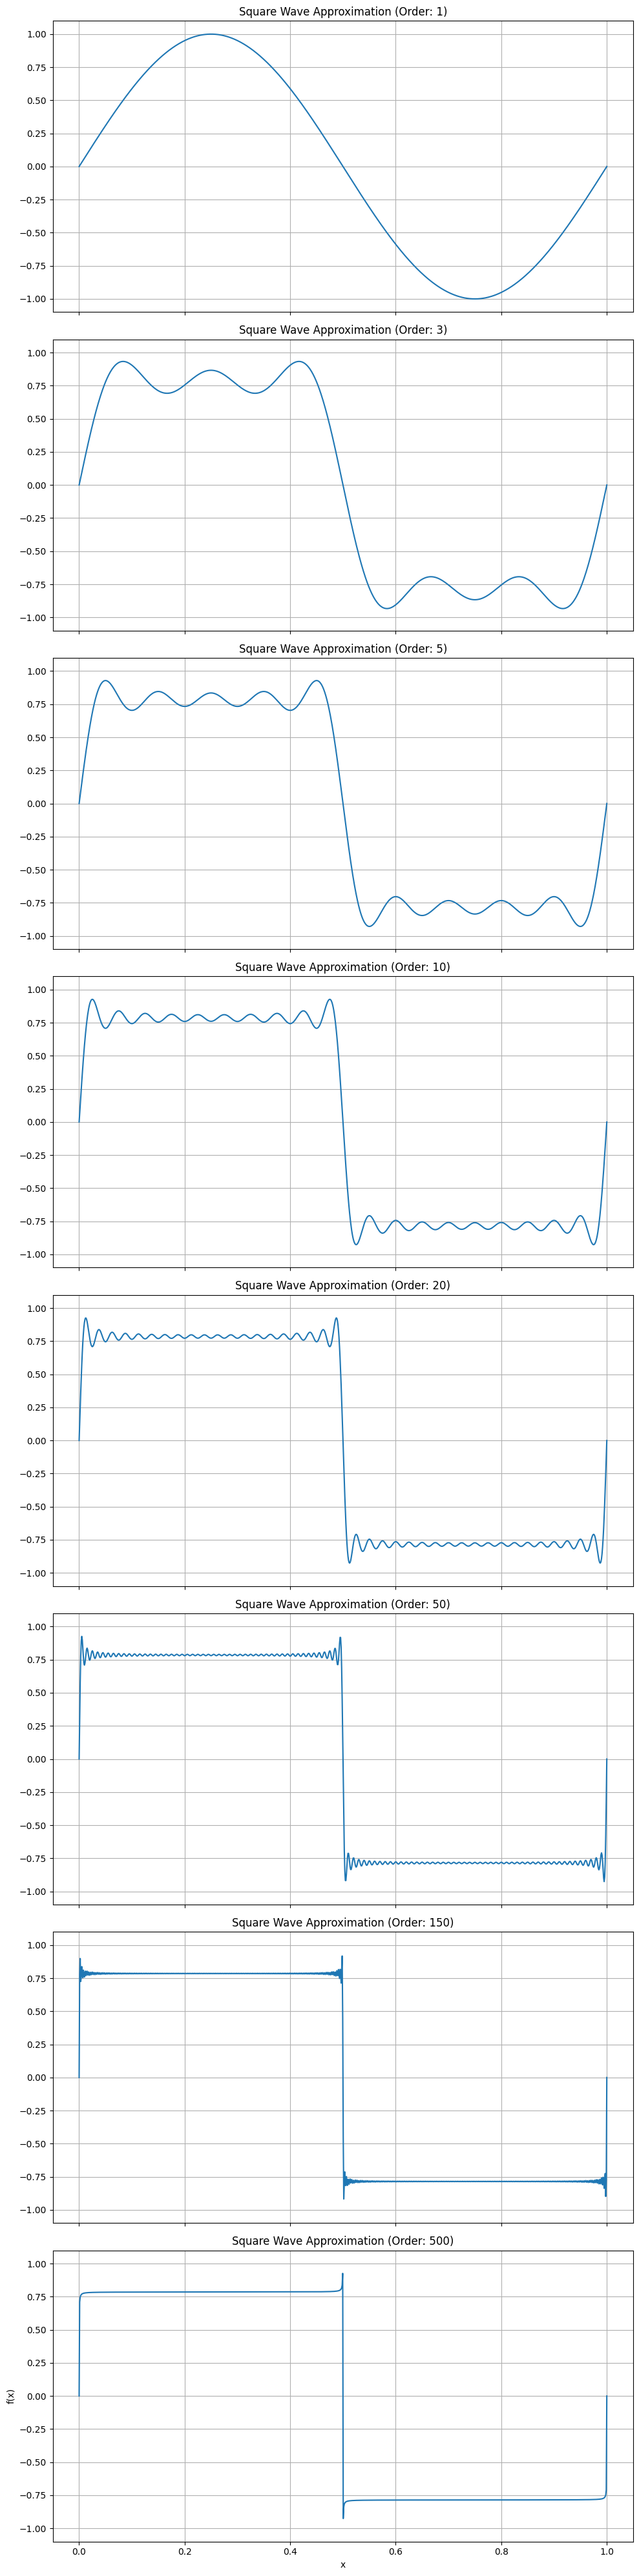

In [9]:
# Example usage:
orders = [1, 3, 5, 10, 20, 50, 150, 500]
plot_square_wave_approximations(orders)

In [30]:
def sine_wave(x, A, f, theta):
  return A * np.sin(2 * np.pi * f * x + theta)

def sine_wave_2d(x, y, A, f, theta):
  
  return A * np.sin(2 * np.pi * f * (x * np.cos(theta) + y * np.sin(theta)))

def plot_sine_wave_fft_2d(theta_values, A=1, f=5, num_points=100):
  x = np.linspace(0, 1, num_points)
  y = np.linspace(0, 1, num_points)
  X, Y = np.meshgrid(x, y)

  fig, axes = plt.subplots(len(theta_values), 4, figsize=(30, 5 * len(theta_values)), sharex='col', sharey='col')

  for row, theta in zip(axes, theta_values):
    y_1d = sine_wave(x, A, f, theta)
    fft_y_1d = np.fft.fftshift(np.fft.fft(y_1d))

    y_2d = sine_wave_2d(X, Y, A, f, theta)
    fft_y_2d = np.fft.fftshift(np.fft.fft2(y_2d))
    
    row[0].imshow(y_2d, cmap='gray', extent=(0, 1, 0, 1), origin='lower')
    row[0].set_title(f"Sine Wave 2D (Theta: {theta})")

    row[1].imshow(np.abs(fft_y_2d), cmap='gray', extent=(0, 1, 0, 1), origin='lower')
    row[1].set_title(f"FFT Magnitude 2D (Theta: {theta})")

    row[2].plot(x, y_1d)
    row[2].set_title(f"Sine Wave 1D (Theta: {theta})")
    row[2].grid()

    row[3].plot(x, np.abs(fft_y_1d))
    row[3].set_title(f"FFT Magnitude 1D (Theta: {theta})")
    row[3].grid()

  plt.tight_layout()
  plt.show()

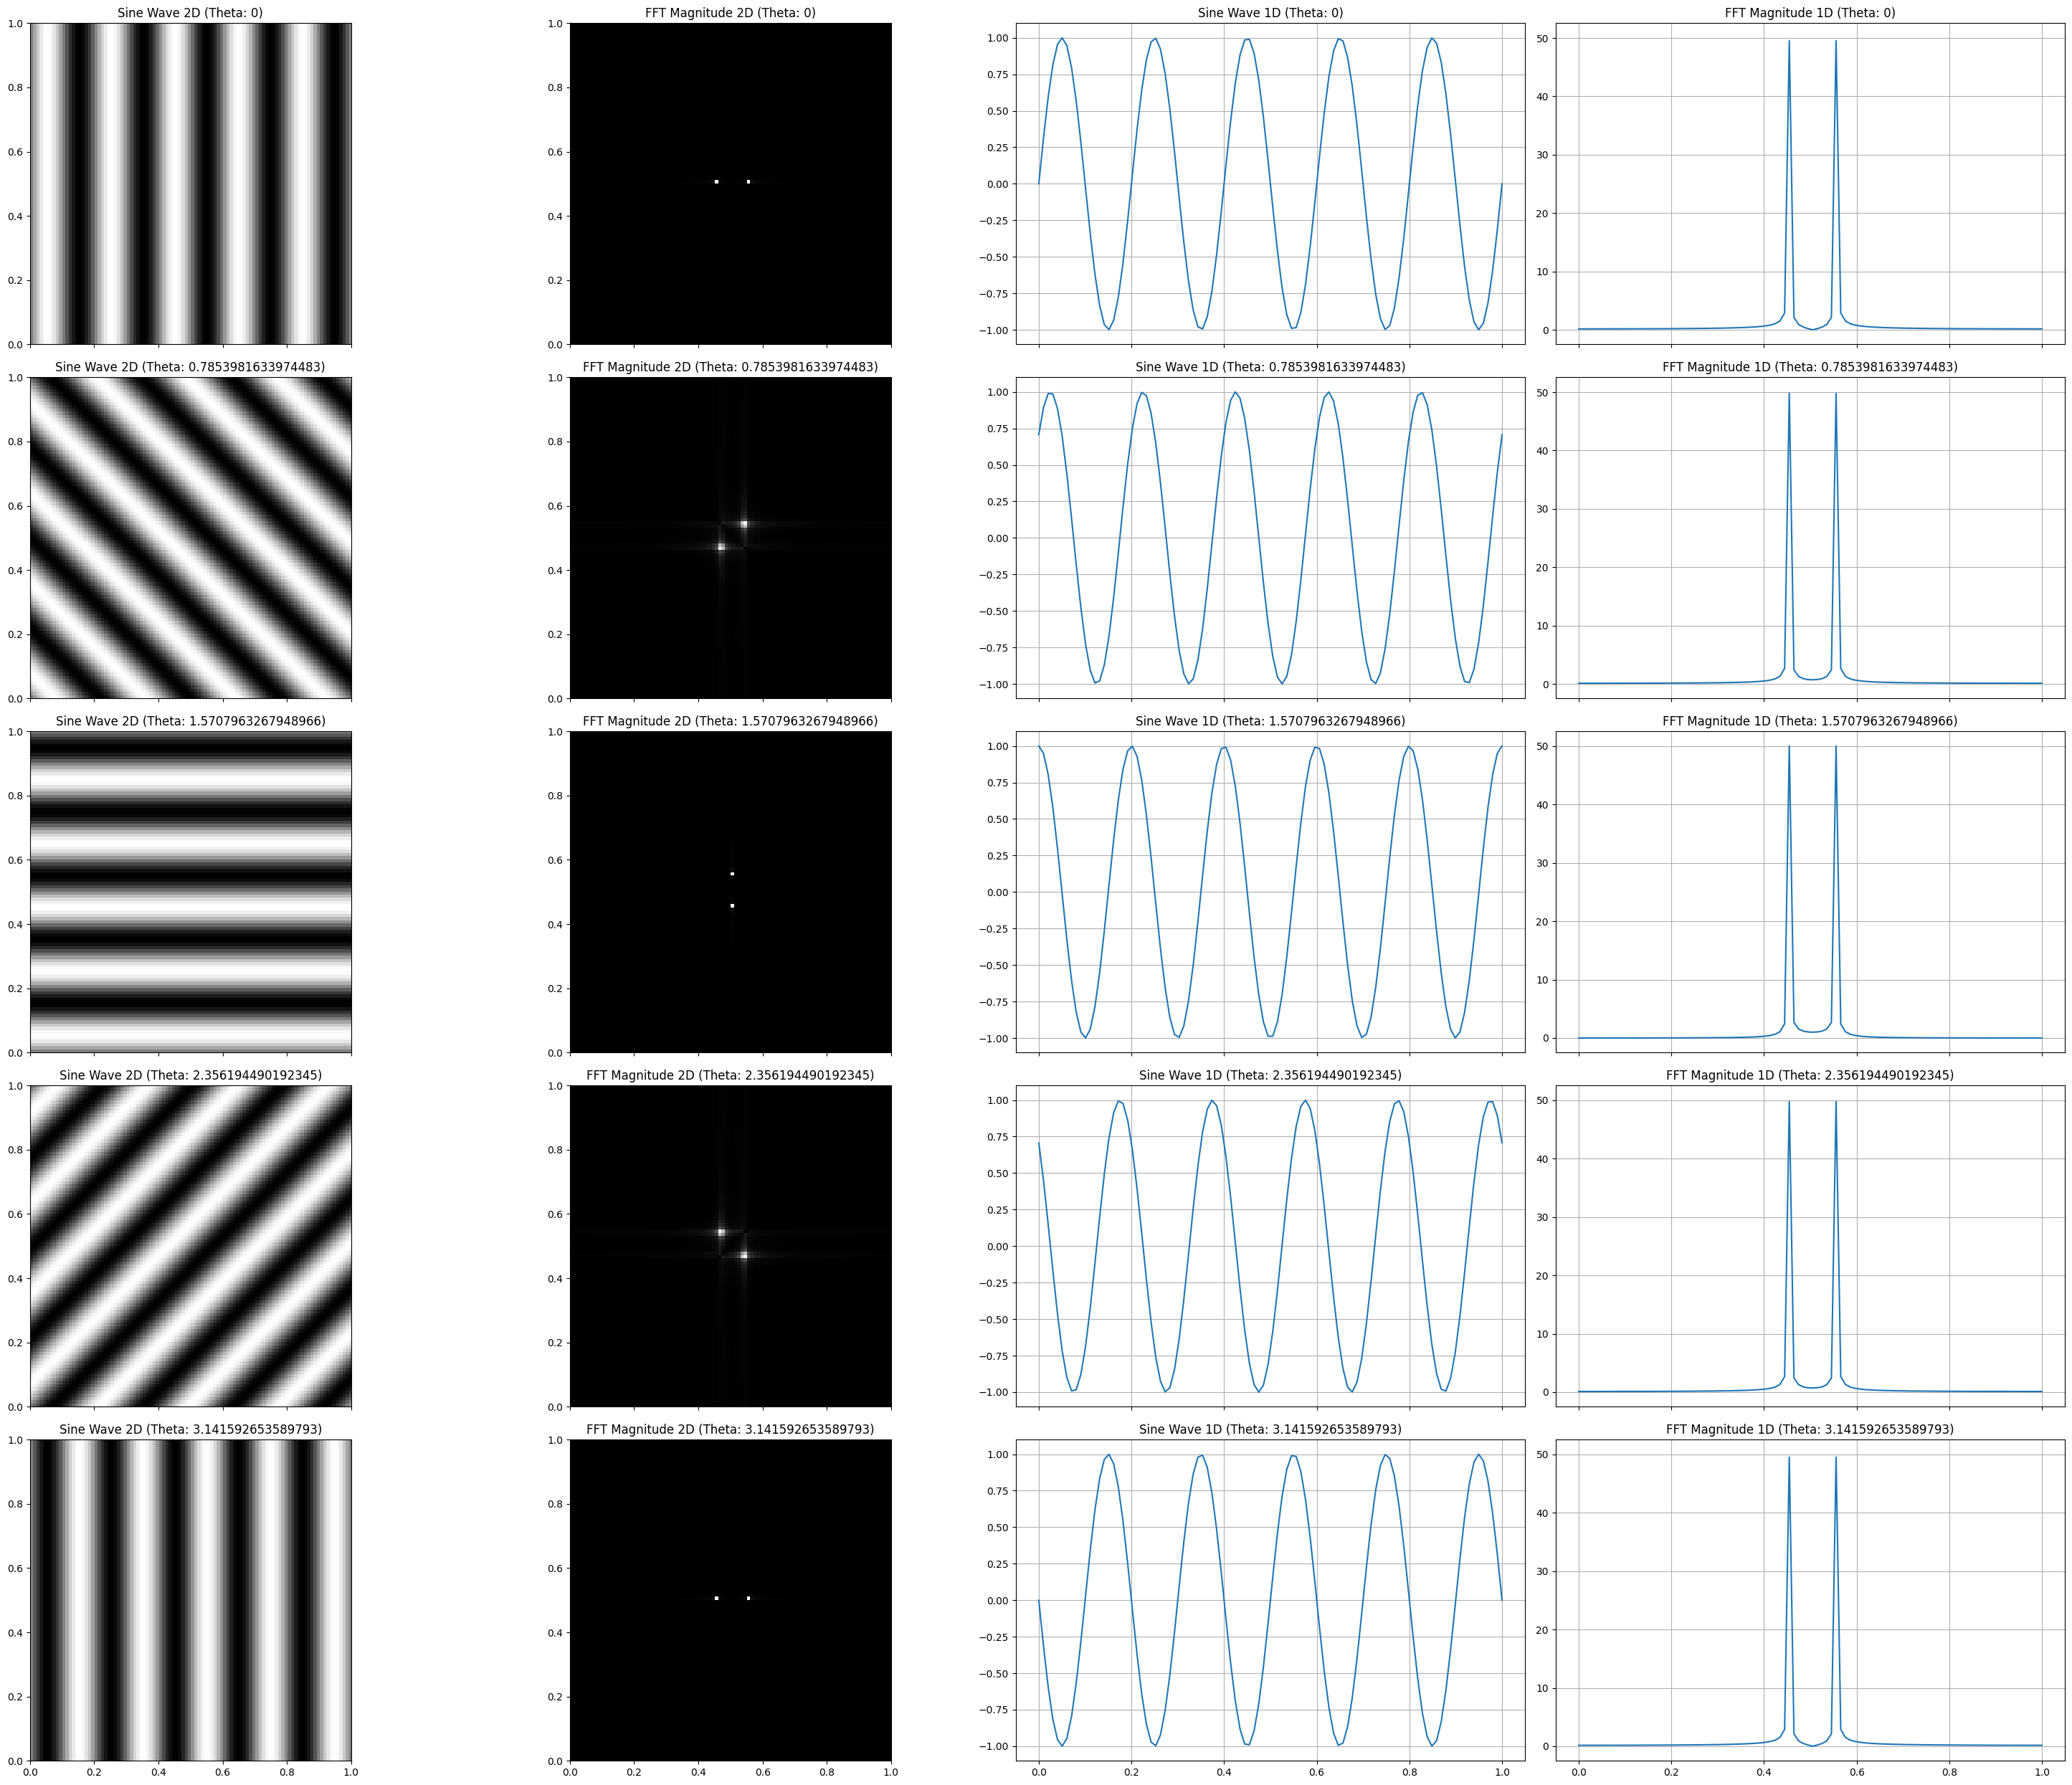

In [31]:
# Example usage:
theta_values = [0, np.pi/4, np.pi/2]
theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
plot_sine_wave_fft_2d(theta_values)